# Imports

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.data.loader import load_prices, compute_returns, ajustar_risk_free
from outputs.charts.markowitz_plot import plot_time_serie, plot_efficient_frontier, markowitz_tradeoff
from src.optimization.markowitz import minimize_volatility, solve_markowitz
from src.optimization.sharpe import maximize_sharpe
from src.optimization.markowitz import minimize_volatility, portfolio_return, portfolio_volatility

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# User input

In [2]:
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA", "WEGE3.SA", "B3SA3.SA", "GGBR4.SA"] # "MGLU3.SA"
start_date = "2017-01-01"
end_date = "2023-01-01"

# Frequência desejada: 'daily', 'weekly', 'monthly', 'annual'
frequencia_retorno = 'daily'
#target_return = 0.01
risk_free_rate = 0.15

# Levantando estatística dos dados

In [3]:
prices = load_prices(tickers, start=start_date, end=end_date)

returns = compute_returns(prices, freq=frequencia_retorno)

mean_returns = returns.mean()
cov_matrix = returns.cov()

/workspaces/deep_learning_finance/src/data/loader.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start, end=end)['Close']
[*********************100%***********************]  9 of 9 completed


In [4]:
type(mean_returns)

pandas.core.series.Series

In [5]:
#print(returns)
print("\n--------------------\n")
print(mean_returns)


--------------------

Ticker
ABEV3.SA    0.000230
B3SA3.SA    0.001046
BBAS3.SA    0.000731
BBDC4.SA    0.000414
GGBR4.SA    0.001257
ITUB4.SA    0.000485
PETR4.SA    0.001295
VALE3.SA    0.001449
WEGE3.SA    0.001596
dtype: float64


In [6]:
cov_matrix

Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GGBR4.SA,ITUB4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,,
ABEV3.SA,0.000338,0.000193,0.000203,0.000204,0.000168,0.000184,0.000205,0.000096,0.000161
B3SA3.SA,0.000193,0.000624,0.000381,0.000325,0.000277,0.000292,0.000350,0.000183,0.000264
BBAS3.SA,0.000203,0.000381,0.000659,0.000466,0.000335,0.000401,0.000497,0.000233,0.000202
BBDC4.SA,0.000204,0.000325,0.000466,0.000515,0.000298,0.000402,0.000396,0.000210,0.000179
GGBR4.SA,0.000168,0.000277,0.000335,0.000298,0.000760,0.000264,0.000430,0.000461,0.000237
ITUB4.SA,0.000184,0.000292,0.000401,0.000402,0.000264,0.000420,0.000337,0.000172,0.000168
PETR4.SA,0.000205,0.000350,0.000497,0.000396,0.000430,0.000337,0.000866,0.000321,0.000233
VALE3.SA,0.000096,0.000183,0.000233,0.000210,0.000461,0.000172,0.000321,0.000655,0.000146
WEGE3.SA,0.000161,0.000264,0.000202,0.000179,0.000237,0.000168,0.000233,0.000146,0.000532


In [7]:
weights_markowitz = minimize_volatility(mean_returns, cov_matrix)

In [8]:
# necesario ajustar (esta fixado em diario)
risk_free_rate_annual = 0.15
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1

weights_sharpe = maximize_sharpe(mean_returns, cov_matrix, risk_free_rate=risk_free_rate_daily)

In [9]:
df_pesos = pd.DataFrame({
    "Ticker": tickers,
    "Peso Markowitz": weights_markowitz,
    "Peso Sharpe": weights_sharpe
})
print(df_pesos.sort_values("Peso Sharpe", ascending=False).round(4))


     Ticker  Peso Markowitz  Peso Sharpe
8  GGBR4.SA          0.1760       0.6245
7  B3SA3.SA          0.1935       0.3576
6  WEGE3.SA          0.0000       0.0179
3  BBDC4.SA          0.0000       0.0000
4  BBAS3.SA          0.0000       0.0000
0  PETR4.SA          0.4291       0.0000
2  ITUB4.SA          0.0000       0.0000
1  VALE3.SA          0.0095       0.0000
5  ABEV3.SA          0.1920       0.0000


### Visualização de Fronteira e Crescimento


🔹 Gráficos para Sharpe


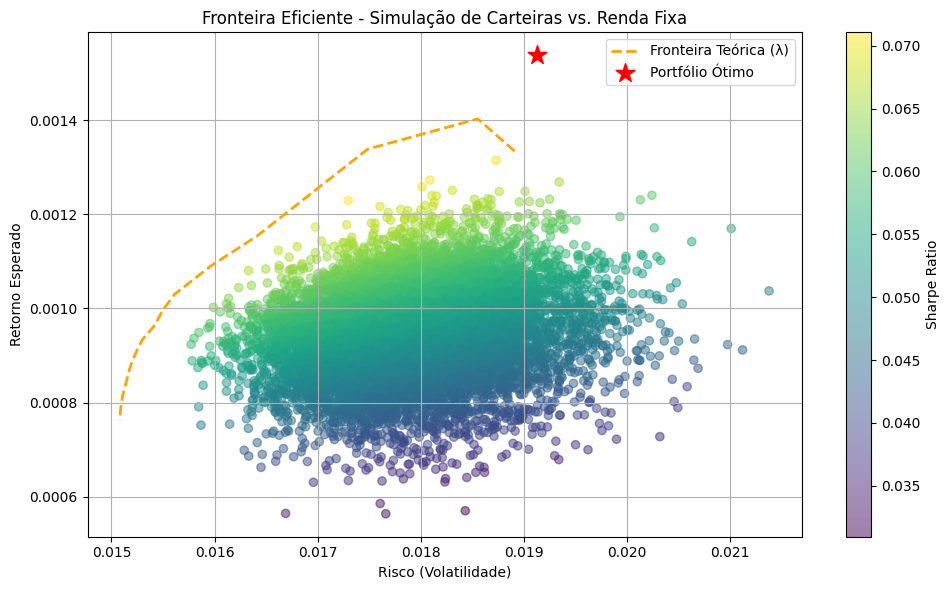

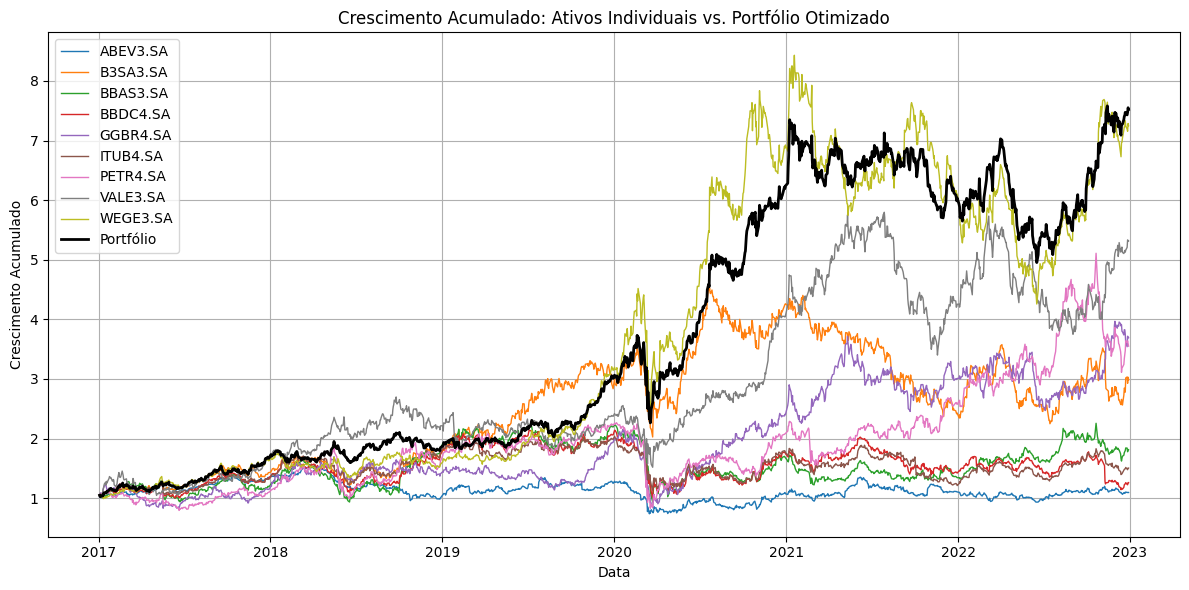


🔹 Gráficos para Markowitz


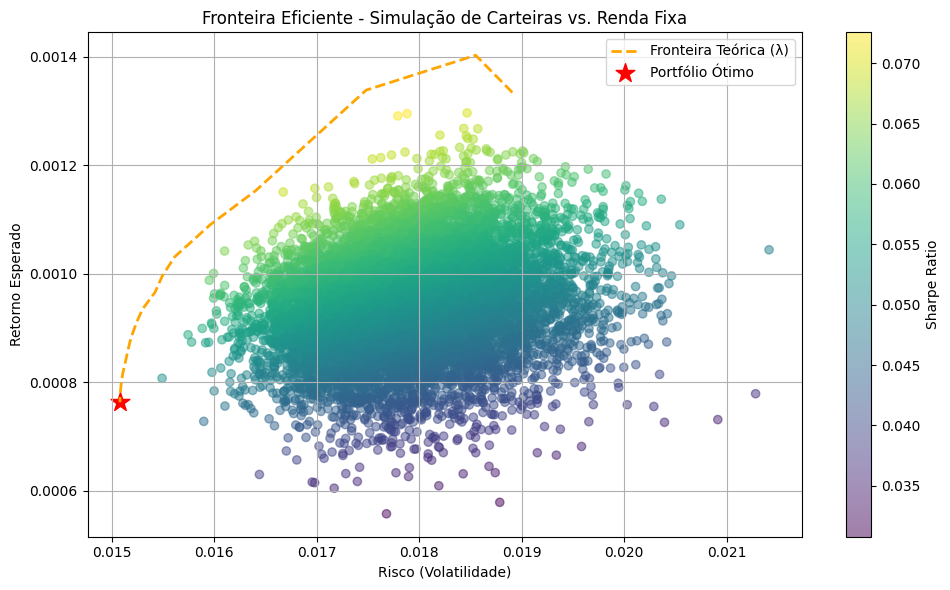

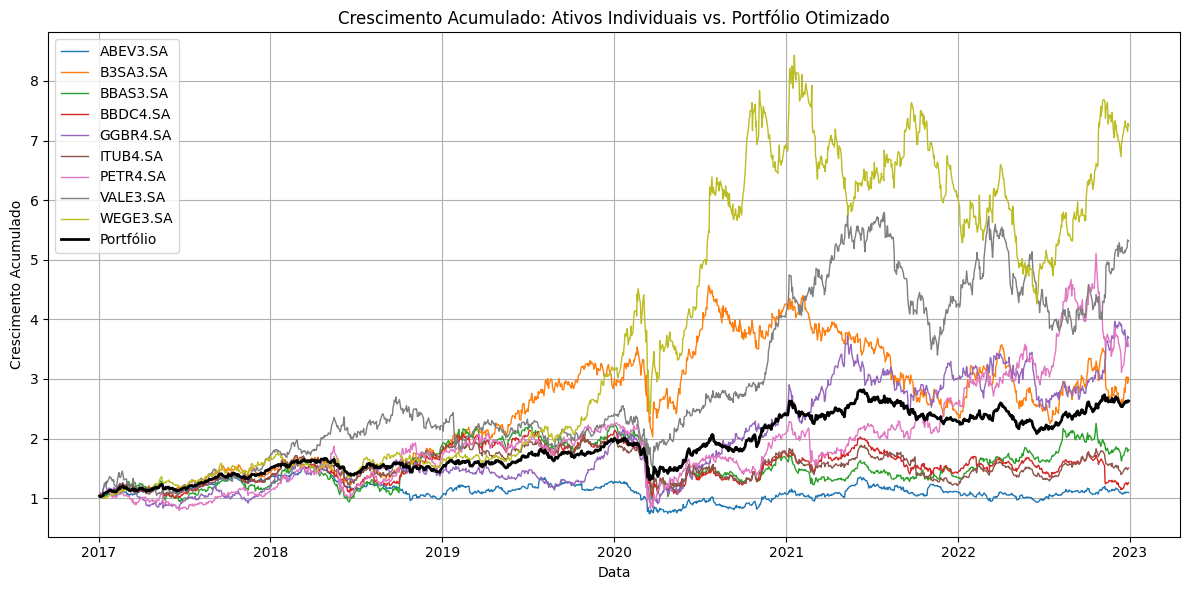

In [10]:
for nome, pesos in [("Sharpe", weights_sharpe), ("Markowitz", weights_markowitz)]:
    print(f"\n🔹 Gráficos para {nome}")
    plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights=pesos)
    plot_time_serie(returns, optimized_weights=pesos)

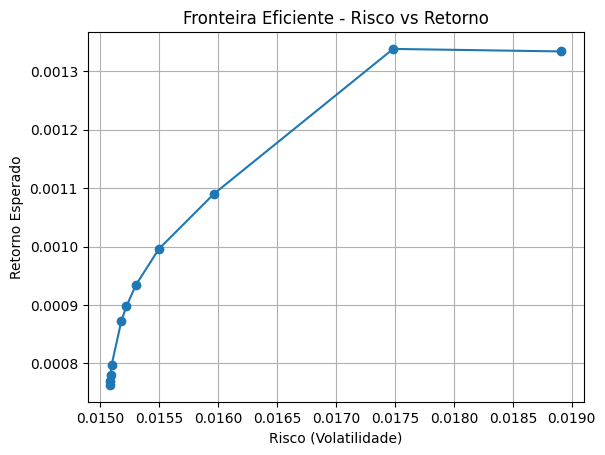

In [11]:
markowitz_tradeoff(mean_returns, cov_matrix, interval=0.1)

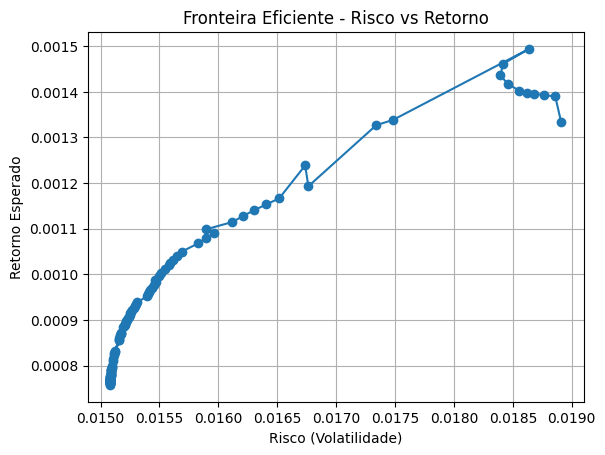

In [12]:
markowitz_tradeoff(mean_returns, cov_matrix, interval=0.01)

In [13]:
# sharpe ratio individual com 100% de investimento em um ativo
sharpe_individual = (mean_returns - risk_free_rate_daily) / np.sqrt(np.diag(cov_matrix))
print(sharpe_individual.sort_values(ascending=False))

Ticker
WEGE3.SA    0.045123
VALE3.SA    0.034940
GGBR4.SA    0.025475
PETR4.SA    0.025150
B3SA3.SA    0.019641
BBAS3.SA    0.006849
ITUB4.SA   -0.003427
BBDC4.SA   -0.006192
ABEV3.SA   -0.017655
dtype: float64


In [14]:
ret_sharpe = portfolio_return(weights_sharpe, mean_returns)
vol_sharpe = portfolio_volatility(weights_sharpe, cov_matrix)
sharpe_ratio = (ret_sharpe - risk_free_rate_daily) / vol_sharpe

print("\nMétricas do Portfólio (Sharpe)")
print("Retorno:", ret_sharpe * 252)  # anualizado
print("Volatilidade:", vol_sharpe * 252)
print("Sharpe Ratio:", sharpe_ratio * 252)


Métricas do Portfólio (Sharpe)
Retorno: 0.38753802642692586
Volatilidade: 4.8206437241907905
Sharpe Ratio: 12.95051205748263


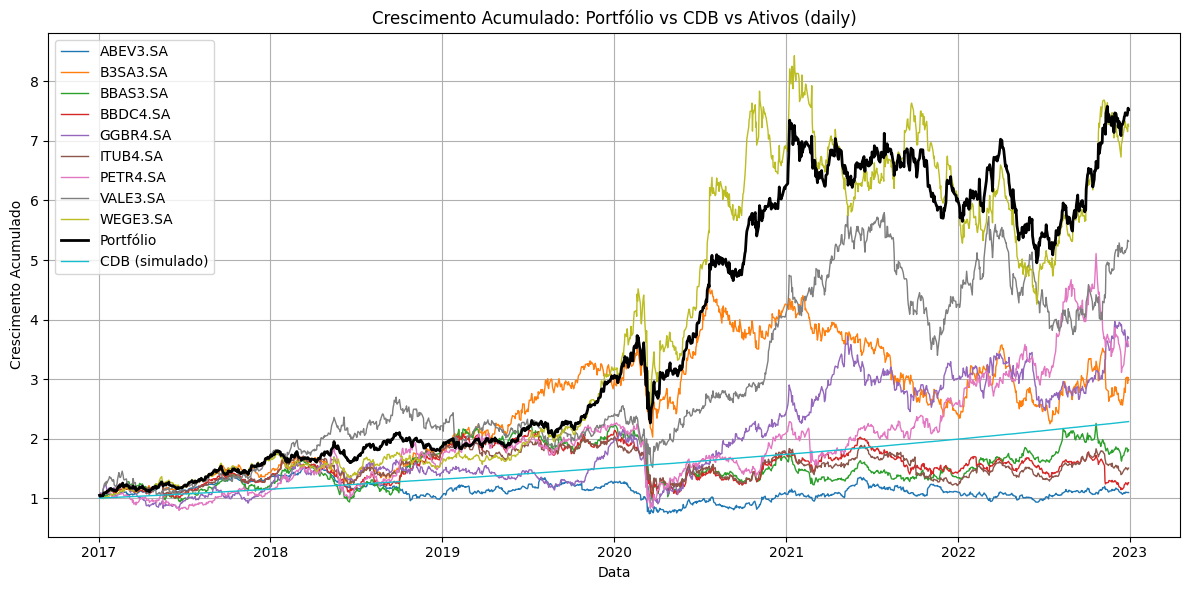

In [15]:
# Definindo taxa anual de benchmark (CDB/CDI)
from outputs.charts.markowitz_plot import compute_benchmark_growth

##cdi_annual = 0.1365

# Número de períodos com base nos retornos calculados
num_periods = len(returns)

# Crescimento acumulado simulado do benchmark
cdb_growth = compute_benchmark_growth(risk_free_rate, frequencia_retorno, num_periods)

returns_acumulados = (1 + returns).cumprod()
returns_acumulados["Portfólio"] = (1 + returns.dot(weights_sharpe)).cumprod()
returns_acumulados["CDB (simulado)"] = cdb_growth

plt.figure(figsize=(12, 6))
for col in returns_acumulados.columns:
    linewidth= 2 if col == 'Portfólio' else 1
    color = 'black' if col == 'Portfólio' else None
    plt.plot(returns_acumulados.index, returns_acumulados[col], label=col, linestyle='-', linewidth=linewidth, color=color)
    

plt.title(f"Crescimento Acumulado: Portfólio vs CDB vs Ativos ({frequencia_retorno})")
plt.xlabel("Data")
plt.ylabel("Crescimento Acumulado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()